Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 1 to 8766
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   AÑO                                   8766 non-null   object
 1   MES                                   8766 non-null   object
 2   DIA                                   8766 non-null   object
 3   Temp a 2 mt                           8766 non-null   object
 4   Temp bulbo humedo 2 mt                8766 non-null   object
 5   velocidad de viento a 10mt rango      8766 non-null   object
 6   Irradiación Kw-hr/m2                  8766 non-null   object
 7   Irradiación cielo despejado Kw-hr/m2  8766 non-null   object
 8   velocidad de viento a 2mt             8766 non-null   object
 9   Indice de claridad de insolación KT   8766 non-null   object
dtypes: object(10)
memory

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15440\3425855654.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datos1=datos1.fillna(method='ffill')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15440\3425855654.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


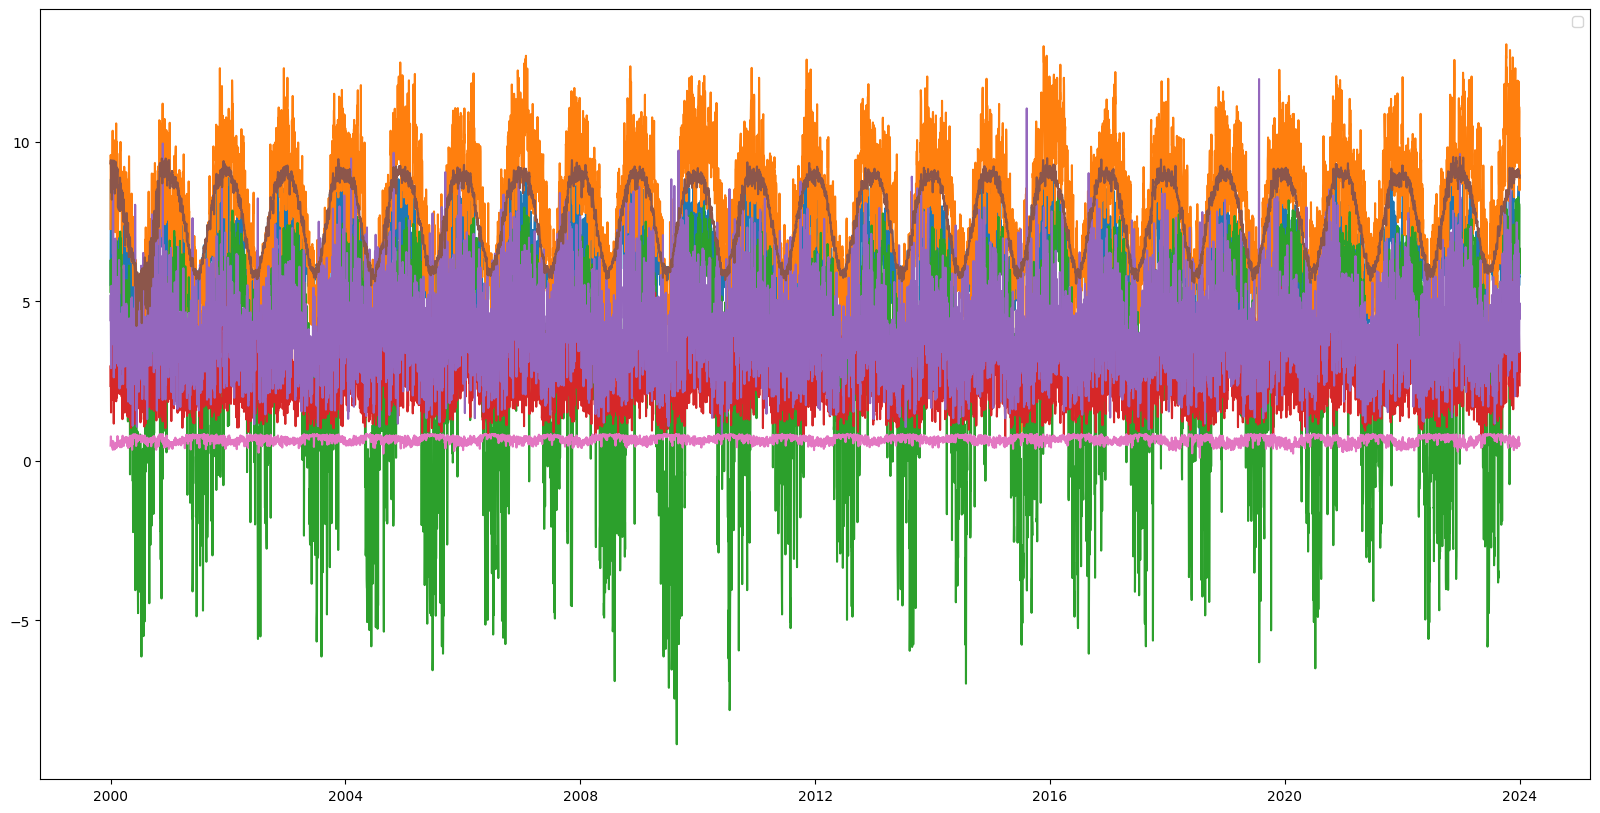

<Figure size 2240x1680 with 0 Axes>

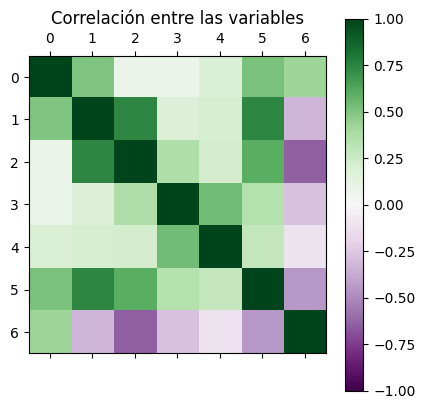

,Irradiación,Temperatura,Temperatura bulbo humedo,Velocidad de viento,Velocidad de viento rango,Irradiación cielo despejado,Indice de claridad de insolación
Irradiación,1.00,0.50,0.08,0.08,0.19,0.51,0.42
Temperatura,0.50,1.00,0.74,0.17,0.21,0.74,-0.33
Temperatura bulbo humedo,0.08,0.74,1.00,0.36,0.23,0.60,-0.65
Velocidad de viento,0.08,0.17,0.36,1.00,0.53,0.34,-0.28
Velocidad de viento rango,0.19,0.21,0.23,0.53,1.00,0.29,-0.11
Irradiación cielo despejado,0.51,0.74,0.60,0.34,0.29,1.00,-0.45
Indice de claridad de insolación,0.42,-0.33,-0.65,-0.28,-0.11,-0.45,1.00


,Irradiación,Temperatura,Irradiación cielo despejado,Indice de claridad de insolación
Fecha,,,,
2000-01-01,5.52,7.27,9.33,0.48
2000-01-02,7.51,9.59,9.40,0.66
2000-01-03,8.83,9.29,9.43,0.77
2000-01-04,7.74,9.31,8.96,0.68
2000-01-05,6.97,8.48,8.67,0.61
...,...,...,...,...
2023-12-27,6.13,10.44,8.93,0.54
2023-12-28,5.50,11.10,8.96,0.48
2023-12-29,5.79,10.95,8.97,0.51


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
############################################################################
#Definición de nombres de columnas:
col_names = ['AÑO','MES','DIA','Temp a 2 mt','Temp bulbo humedo 2 mt','velocidad de viento a 10mt rango','Irradiación Kw-hr/m2','Irradiación cielo despejado Kw-hr/m2','velocidad de viento a 2mt','Indice de claridad de insolación KT']
import pandas as pd

#Carga de datos desde un archivo CSV:
datos = pd.read_csv('POWER_Point_Daily_20000101_20231231_015d8244S_070d0187W_LST.csv',names=col_names,sep=',')
#Visualización de los primeros registros del dataset:
datos.head()
############################################################################
##Limpieza de Datos
############################################################################
#Reemplazo de valores faltantes representados por -999 con NaN:
datos1=datos.replace("-999", np.nan)
datos1

#Verificación de valores faltantes en el dataset:
datos1.isnull().sum()
null_columns = datos1.columns[datos1.isnull().any()]
datos1[null_columns].isnull().sum()
print(datos1[datos1.isnull().any(axis=1)][null_columns].head())

#Relleno de valores faltantes con el método de propagación hacia adelante (ffill):
datos1=datos1.fillna(method='ffill')
datos1

#Verificación nuevamente de valores faltantes después del relleno:
null_columns = datos1.columns[datos1.isnull().any()]
datos1[null_columns].isnull().sum()
print(datos1[datos1.isnull().any(axis=1)][null_columns].head())
datos1.isnull().sum()

#Eliminación de la primera fila si es necesario:
datos1 = datos1.drop([0],axis=0)
datos1
################################################################
###Exploración y Transformación de Datos
################################################################

#Descripción estadística del dataset:
datos1.describe()

#Información general del dataset:
datos1.info()

#Conversión de datos a tipo float:
datos2 = datos1.astype(float, errors = 'raise')
datos2.dtypes
datos2

#Normalización de datos para ciertas columnas:
def normalize(data, key):
    return (data[key] - data[key].min()) / (data[key].max() - data[key].min())
#Creación de un nuevo DataFrame con columnas seleccionadas y formateo de fechas:
datos3 = pd.DataFrame(columns=['Fecha','Irradiación','Temperatura','Temperatura bulbo humedo','Velocidad de viento',
                               'Velocidad de viento rango','Irradiación cielo despejado',
                               'Indice de claridad de insolación'])
datos3['Fecha'] = datos1['AÑO'] + '-' + datos['MES'] + '-' + datos['DIA']
datos3['Temperatura'] = datos1['Temp a 2 mt']
datos3['Temperatura bulbo humedo'] = datos1['Temp bulbo humedo 2 mt']
datos3['Velocidad de viento'] = datos1['velocidad de viento a 2mt']
datos3['Velocidad de viento rango'] = datos1['velocidad de viento a 10mt rango']
datos3['Irradiación cielo despejado'] = datos1['Irradiación cielo despejado Kw-hr/m2']
datos3['Indice de claridad de insolación'] = datos1['Indice de claridad de insolación KT']
datos3['Irradiación'] = datos1['Irradiación Kw-hr/m2']
datos3 = datos3.drop([0],axis=0)
datos3
#############################################################################
##Preparación de Datos para Modelado
#############################################################################

#Establecimiento de la columna 'Fecha' como índice:
datos3.set_index('Fecha',inplace = True)
datos3
#datos3.describe()
datos3.info()

#Conversión de índices a formato de fecha y ajuste de tipos de datos:
datos3.index = pd.to_datetime(datos3.index)
datos3
datos3 = datos3.astype(float, errors = 'raise')
datos3.dtypes

#Visualización de los datos a lo largo del tiempo:
plt.figure(figsize=(20,10))
plt.plot(datos3, scalex=1)
plt.legend()

#Resampleo de los datos para manejar frecuencias temporales:
data_train = datos3
data_train
data_train = data_train.resample('1D').ffill().bfill()
data_train

#Normalización de los datos con una función personalizada:
def normalize(data, key):
    return (data[key] - data[key].min()) / (data[key].max() - data[key].min())
radiación = normalize(data_train, 'Irradiación')
Temp = normalize(data_train, 'Temperatura')
Temp_bulbo_humedo = normalize(data_train, 'Temperatura bulbo humedo')
Velocidad_de_viento = normalize(data_train, 'Velocidad de viento')
velocidad_de_viento_rango = normalize(data_train, 'Velocidad de viento rango')
Irradiación_cielo_despejado = normalize(data_train, 'Irradiación cielo despejado')
Indice_de_claridad_de_insolación_KT = normalize(data_train, 'Indice de claridad de insolación')
print([i for i in range(0, len(data_train.columns))])
print([c for c in data_train.columns])
##############################################################################
###Análisis de Correlación
##############################################################################

#Cálculo de la matriz de correlación utilizando el método de Spearman:
data_train.corr(method='spearman')

#Visualización de la matriz de correlación con un mapa de calor:
#corr=data_train.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn'
plt.figure(dpi=350)
plt.matshow(data_train.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Correlación entre las variables')
plt.colorbar()
plt.show()

#Ajuste y visualización de la matriz de correlación con estilos y precisión específica:
corr = data_train.corr(method='spearman')
#corr.style.background_gradient(cmap='PuBu').set_precision(2)
styled_corr = corr.style.background_gradient(cmap='PuBu').format(precision=2)#corregido
display(styled_corr)
#############################################################################
####Selección de Características
#############################################################################

#Eliminación de columnas no relevantes para el análisis o modelado:
data_train = data_train.drop(columns=['Temperatura bulbo humedo', 'Velocidad de viento', 'Velocidad de viento rango'])
data_train



#############################################################################
###Modelado y Evaluación




In [23]:
#RED NEURONAL
#Carga y Preparación de Datos
features = datos3[['Temperatura', 'Irradiación cielo despejado', 'Indice de claridad de insolación']]  # Ejemplo de características
target = datos3['Irradiación']

#Normalización de las características:
# Normalización
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

#CONSTRUCCION DE MODELOS
#Construcción del Modelo Perceptron
#RED NEURONAL PERCEPTRON
#Importación de librerías necesarias para el modelo:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History

# Crear el modelo Perceptron
model_perceptron = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model_perceptron.compile(optimizer='adam', loss='mse')

# Mostrar el resumen del modelo
model_perceptron.summary()

# Entrenar el modelo
history_perceptron = model_perceptron.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[History()])


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23.2634 - val_loss: 0.2706
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.2371 - val_loss: 0.1634
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.1451 - val_loss: 0.0948
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.0826 - val_loss: 0.0501
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.0436 - val_loss: 0.0296
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0249 - val_loss: 0.0247
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.0205 - val_loss: 0.0236
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0200 - val_loss: 0.0235
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.0197 - val_loss: 0.0260
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.0179 - val_loss: 0.0225
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0206 - val_loss: 0.0228
Epoch 12/50
176/176 ━━━━━━━━━━━

In [ ]:
#RED NEURONAL LSTM 
#Construcción y Entrenamiento del Modelo LSTM
#Importación de librerías necesarias para el modelo:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import History

#Reformateo de los datos de entrenamiento y prueba:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

#Creación de un historial para el seguimiento del entrenamiento:
history_lstm = History()

#Definición y construcción del modelo LSTM:
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])

#Compilación del modelo:
model_lstm.compile(optimizer='adam', loss='mse')

# Mostrar el resumen del modelo
model_lstm.summary()

#Entrenamiento del modelo LSTM:
#model_lstm.fit(X_train_lstm, y_train, epochs=50, validation_split=0.2, callbacks=[history_lstm])

#codigo alterno
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=50, validation_split=0.2, callbacks=[History()])

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38.0612 - val_loss: 9.3163
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 3.9485 - val_loss: 0.3273
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.3022 - val_loss: 0.2865
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.2680 - val_loss: 0.2472
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2184 - val_loss: 0.2119
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.2055 - val_loss: 0.1817
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.1721 - val_loss: 0.1500
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.1380 - val_loss: 0.1203
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.1197 - val_loss: 0.1017
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.1034 - val_loss: 0.0886
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0861 - val_loss: 0.0770
Epoch 12/50
176/176 ━━━━━━━━━━━

In [25]:
#RED NEURONAL CONVOLUCIONAL (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import History

#Reformateo de los datos de entrenamiento y prueba:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#Creación de un historial para el seguimiento del entrenamiento:
history_cnn = History()

#Definición y construcción del modelo CNN:
model_cnn = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

#Compilación del modelo:
model_cnn.compile(optimizer='adam', loss='mse')

# Mostrar el resumen del modelo
model_cnn.summary()

#Entrenamiento del modelo CNN:
#model_cnn.fit(X_train_cnn, y_train, epochs=50, validation_split=0.2, callbacks=[history_cnn])

##codigo alterno
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, validation_split=0.2, callbacks=[History()])

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,493 (13.64 KB)

 Trainable params: 3,493 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.9135 - val_loss: 0.5979
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5749 - val_loss: 0.5339
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4942 - val_loss: 0.4214
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3737 - val_loss: 0.3045
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2844 - val_loss: 0.2208
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1971 - val_loss: 0.1649
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1477 - val_loss: 0.1356
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1302 - val_loss: 0.1272
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1222 - val_loss: 0.1220
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1104 - val_loss: 0.1062
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0962 - val_loss: 0.1005
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [35]:
##EVALUACIÓN DE MODELOS
# Predecir valores
y_pred_perceptron = model_perceptron.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_cnn = model_cnn.predict(X_test_cnn)

# Convertir a series de pandas para facilitar el manejo
y_test_series = pd.Series(y_test)
y_pred_perceptron_series = pd.Series(y_pred_perceptron.flatten())
y_pred_lstm_series = pd.Series(y_pred_lstm.flatten())
y_pred_cnn_series = pd.Series(y_pred_cnn.flatten())


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


In [36]:
#COMPARACIÓN Y METRICAS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular las predicciones
y_pred_perceptron = model_perceptron.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()
y_pred_cnn = model_cnn.predict(X_test_cnn).flatten()

# Calcular métricas
metrics = {
    'MAE': [
        mean_absolute_error(y_test, y_pred_perceptron),
        mean_absolute_error(y_test, y_pred_lstm),
        mean_absolute_error(y_test, y_pred_cnn)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_perceptron),
        mean_squared_error(y_test, y_pred_lstm),
        mean_squared_error(y_test, y_pred_cnn)
    ],
    'R2': [
        r2_score(y_test, y_pred_perceptron),
        r2_score(y_test, y_pred_lstm),
        r2_score(y_test, y_pred_cnn)
    ]
}

#Crear un DataFrame con las métricas:
metrics_df = pd.DataFrame(metrics, index=['Perceptron', 'LSTM', 'CNN'])

# Mostrar las métricas
print(metrics_df)

# Determinar el mejor modelo basado en MAE
best_model_index = metrics_df['MAE'].idxmin()
#best_model_name = metrics_df.index[best_model_index]
print(f"El mejor modelo es: {best_model_index}")

# Guardar el mejor modelo
#best_model_predictions = [y_pred_perceptron, y_pred_lstm, y_pred_cnn][best_model_index]
best_model_index

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
                 MAE       MSE        R2
Perceptron  0.081679  0.015261  0.986414
LSTM        0.103762  0.020455  0.981791
CNN         0.122604  0.031818  0.971676
El mejor modelo es: Perceptron


'Perceptron'

You should consider upgrading via the 'C:\Users\Usuario\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


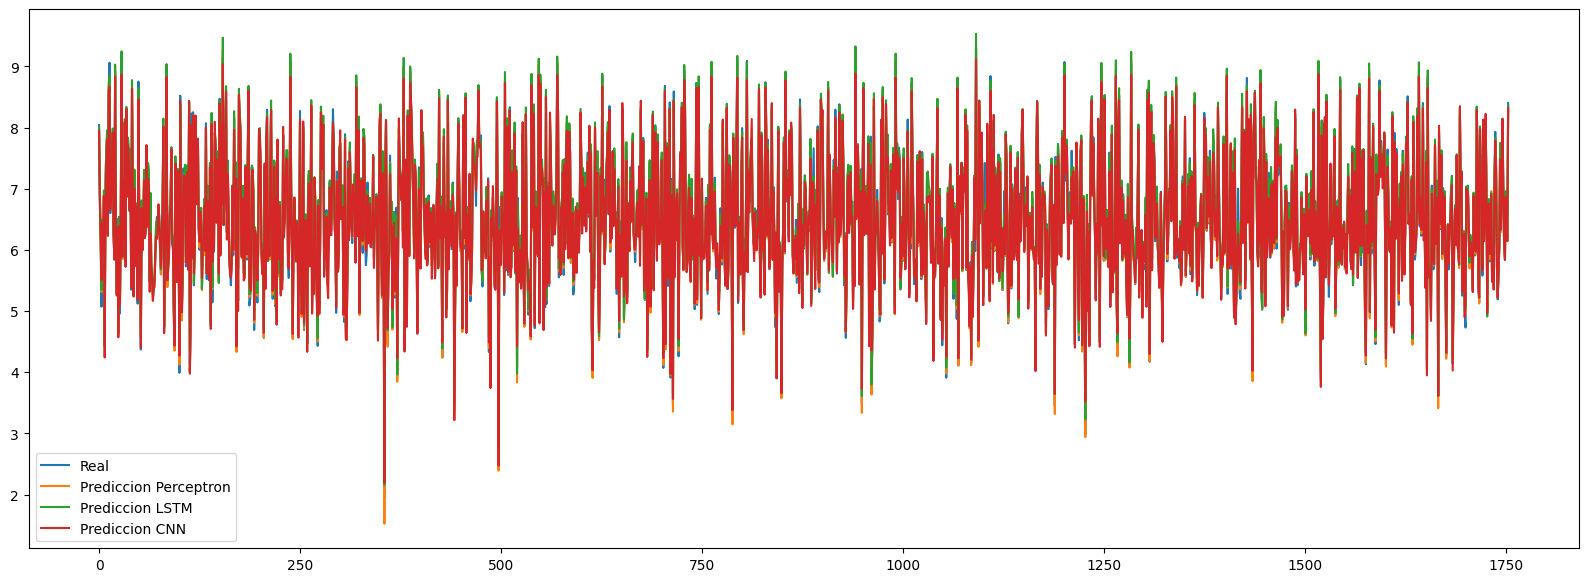

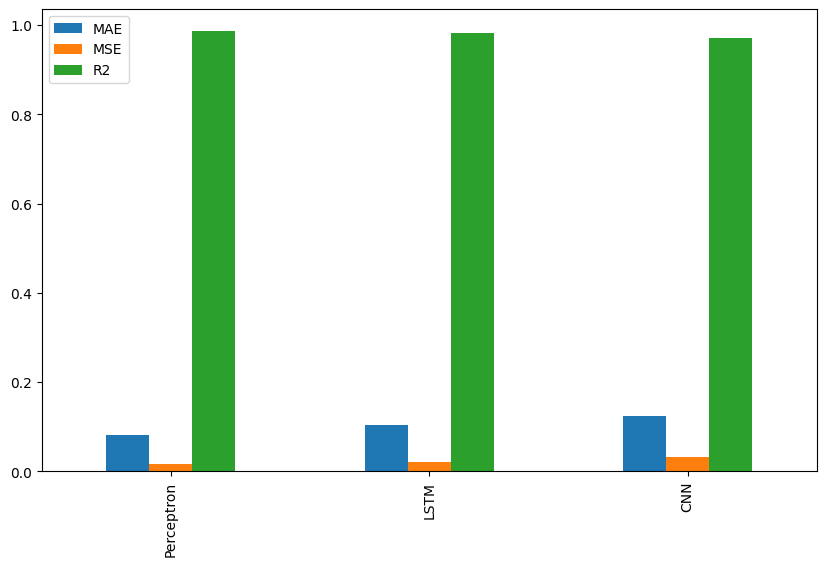

In [37]:
#VISUALIZACIÓN
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Plot de comparación de valores reales y predichos
plt.figure(figsize=(20, 7))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred_perceptron_series, label='Prediccion Perceptron')
plt.plot(y_pred_lstm_series, label='Prediccion LSTM')
plt.plot(y_pred_cnn_series, label='Prediccion CNN')
plt.legend()
plt.show()

# Plot de métricas
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.show()



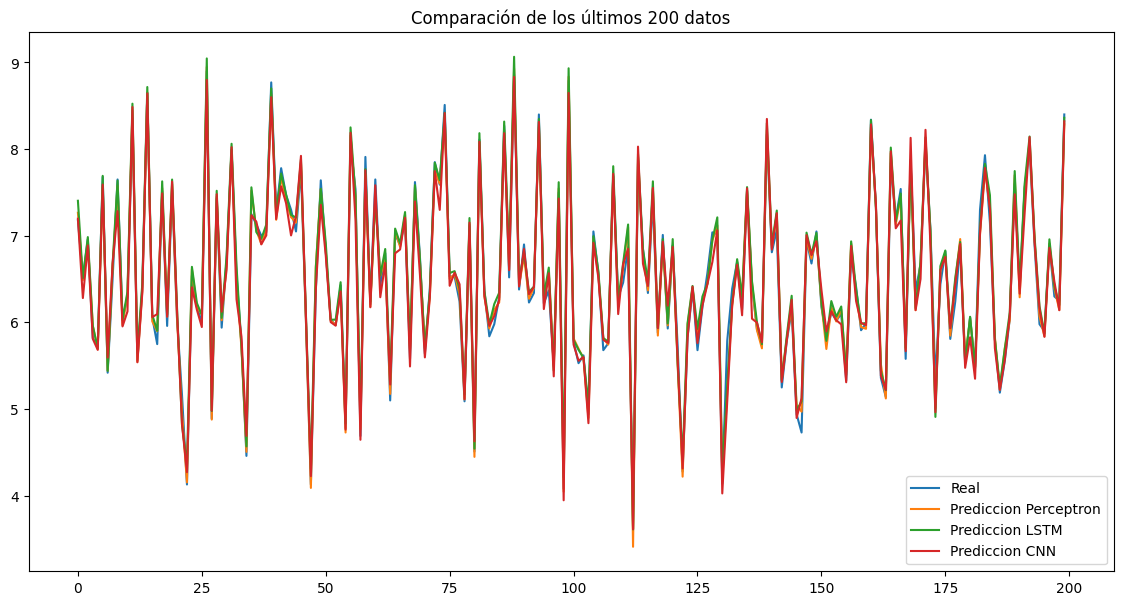

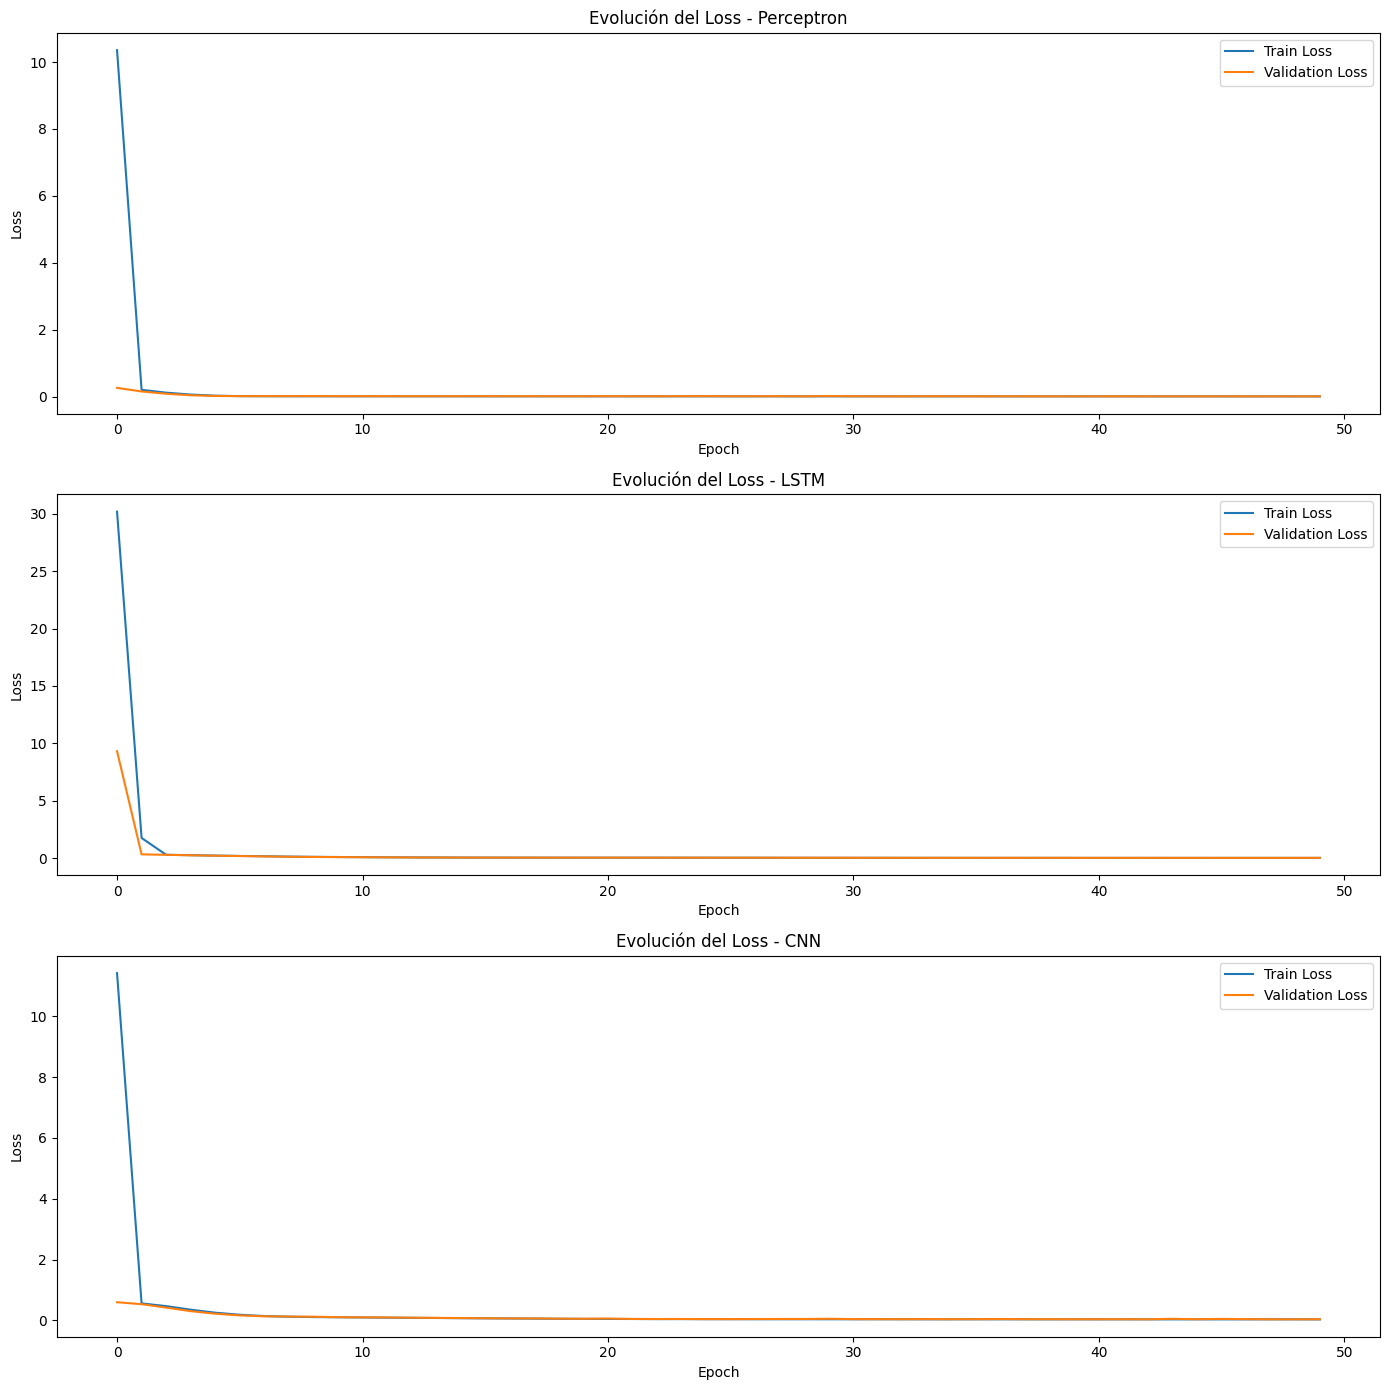

In [38]:
#Se añade la visualización de los últimos 200 datos predichos frente a los valores reales,
#y también se incluye la evolución del loss durante el entrenamiento para los modelos Perceptron,
# LSTM y CNN.

import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de los últimos 200 datos
last_200 = len(y_test) - 200 if len(y_test) > 200 else 0

plt.figure(figsize=(14, 7))
plt.plot(y_test.values[last_200:], label='Real')
plt.plot(y_pred_perceptron_series.values[last_200:], label='Prediccion Perceptron')
plt.plot(y_pred_lstm_series.values[last_200:], label='Prediccion LSTM')
plt.plot(y_pred_cnn_series.values[last_200:], label='Prediccion CNN')
plt.legend()
plt.title('Comparación de los últimos 200 datos')
plt.show()

# Visualización de la evolución del loss durante el entrenamiento

plt.figure(figsize=(14, 14))

# Perceptron
plt.subplot(3, 1, 1)
plt.plot(history_perceptron.history['loss'], label='Train Loss')
plt.plot(history_perceptron.history['val_loss'], label='Validation Loss')
plt.title('Evolución del Loss - Perceptron')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# LSTM
plt.subplot(3, 1, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Evolución del Loss - LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# CNN
plt.subplot(3, 1, 3)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Evolución del Loss - CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

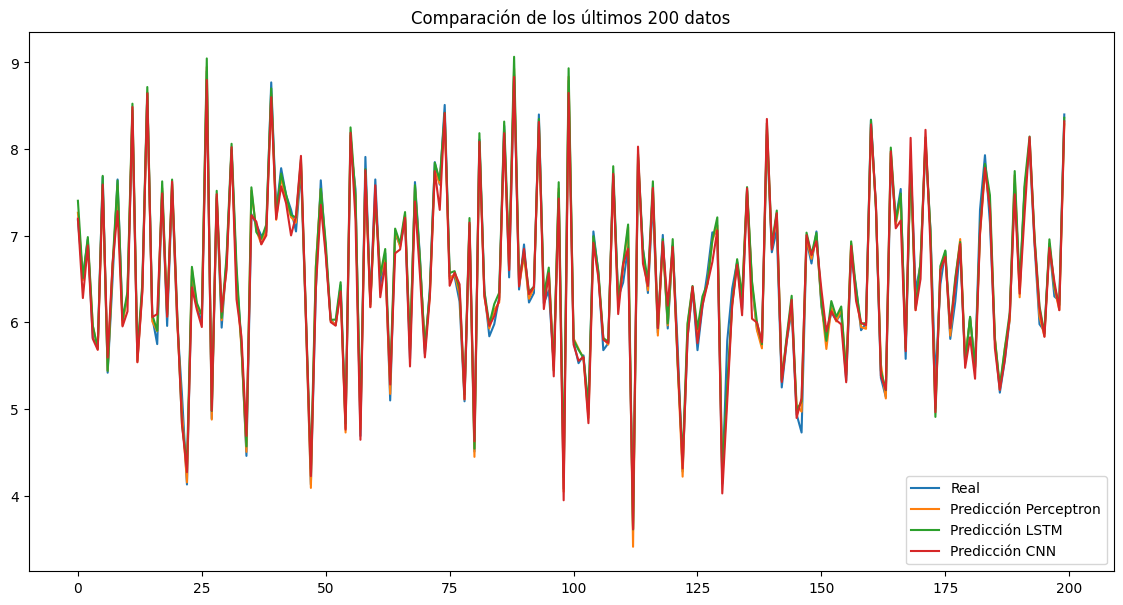

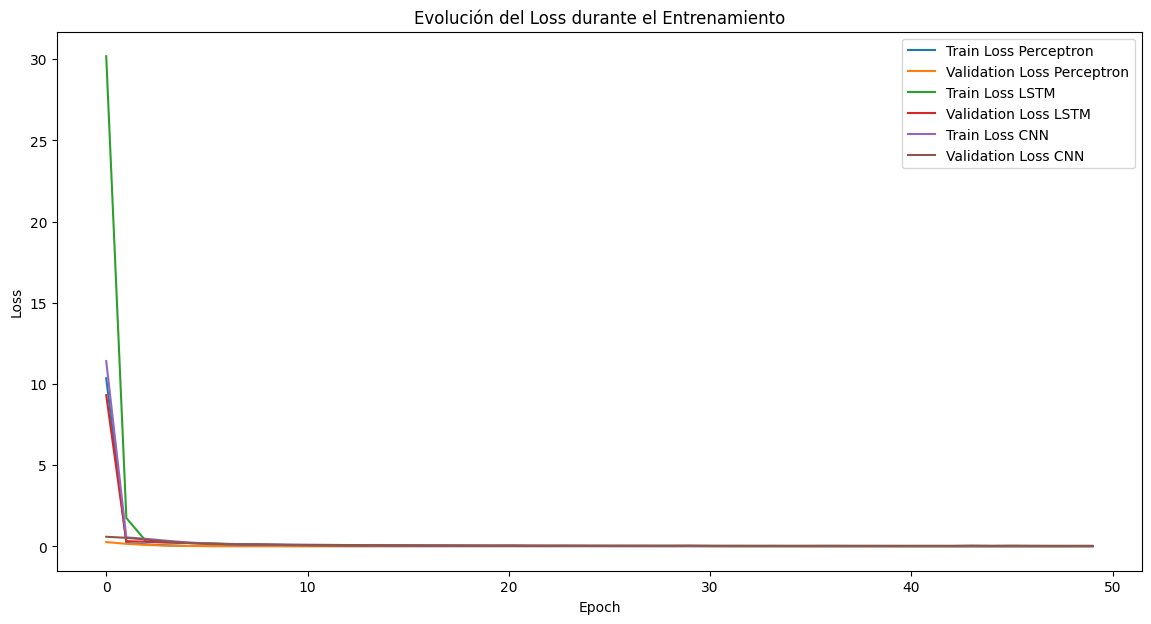

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de los últimos 200 datos
last_200 = len(y_test) - 200 if len(y_test) > 200 else 0

plt.figure(figsize=(14, 7))
plt.plot(y_test.values[last_200:], label='Real')
plt.plot(y_pred_perceptron_series.values[last_200:], label='Predicción Perceptron')
plt.plot(y_pred_lstm_series.values[last_200:], label='Predicción LSTM')
plt.plot(y_pred_cnn_series.values[last_200:], label='Predicción CNN')
plt.legend()
plt.title('Comparación de los últimos 200 datos')
plt.show()

# Visualización de la evolución del loss durante el entrenamiento
plt.figure(figsize=(14, 7))

# Perceptron
plt.plot(history_perceptron.history['loss'], label='Train Loss Perceptron')
plt.plot(history_perceptron.history['val_loss'], label='Validation Loss Perceptron')

# LSTM
plt.plot(history_lstm.history['loss'], label='Train Loss LSTM')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss LSTM')

# CNN
plt.plot(history_cnn.history['loss'], label='Train Loss CNN')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss CNN')

plt.title('Evolución del Loss durante el Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

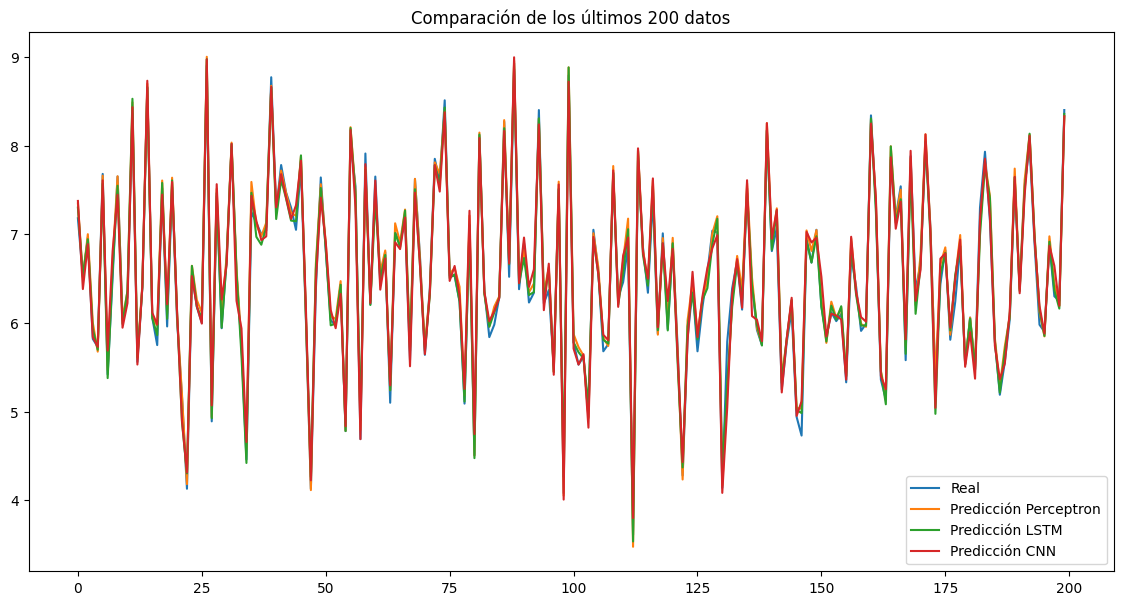

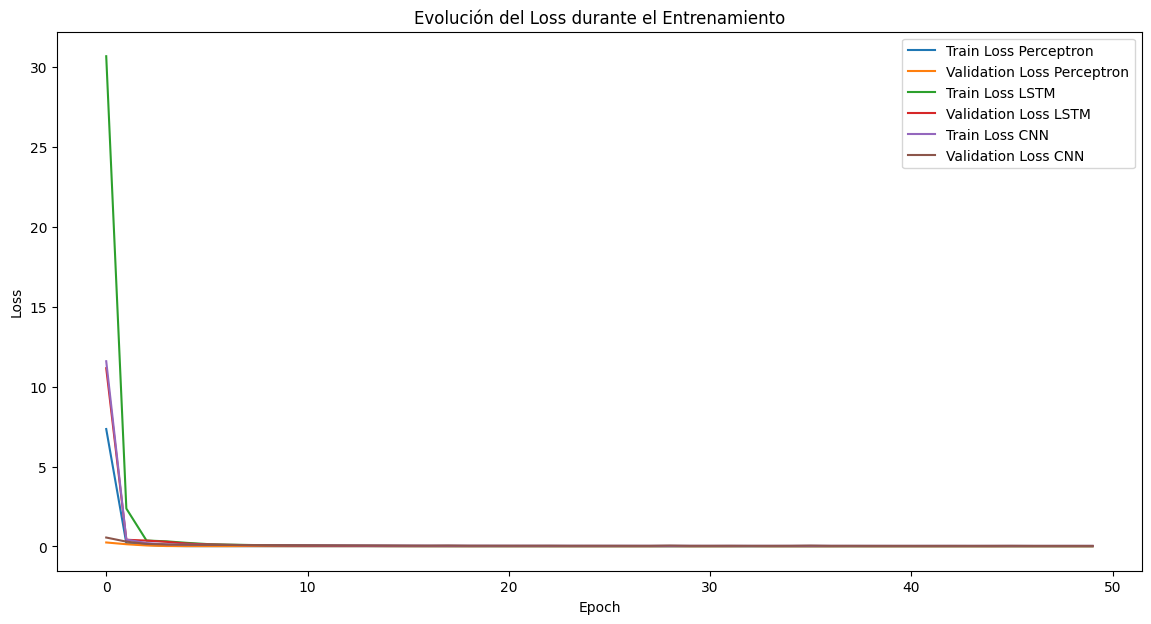

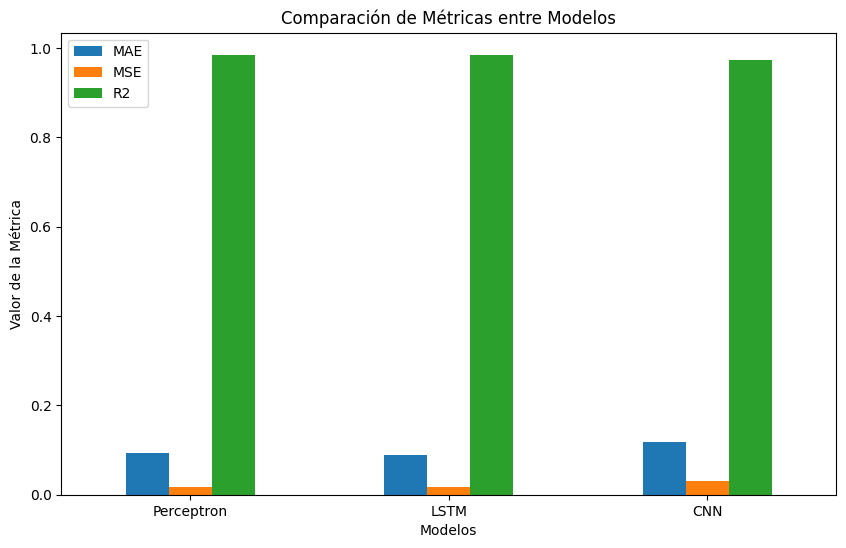

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de los últimos 200 datos
last_200 = len(y_test) - 200 if len(y_test) > 200 else 0

plt.figure(figsize=(14, 7))
plt.plot(y_test.values[last_200:], label='Real')
plt.plot(y_pred_perceptron_series.values[last_200:], label='Predicción Perceptron')
plt.plot(y_pred_lstm_series.values[last_200:], label='Predicción LSTM')
plt.plot(y_pred_cnn_series.values[last_200:], label='Predicción CNN')
plt.legend()
plt.title('Comparación de los últimos 200 datos')
plt.show()

# Visualización de la evolución del loss durante el entrenamiento
plt.figure(figsize=(14, 7))

# Perceptron
plt.plot(history_perceptron.history['loss'], label='Train Loss Perceptron')
plt.plot(history_perceptron.history['val_loss'], label='Validation Loss Perceptron')

# LSTM
plt.plot(history_lstm.history['loss'], label='Train Loss LSTM')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss LSTM')

# CNN
plt.plot(history_cnn.history['loss'], label='Train Loss CNN')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss CNN')

plt.title('Evolución del Loss durante el Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparación de métricas
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor de la Métrica')
plt.xticks(rotation=0)
plt.show()

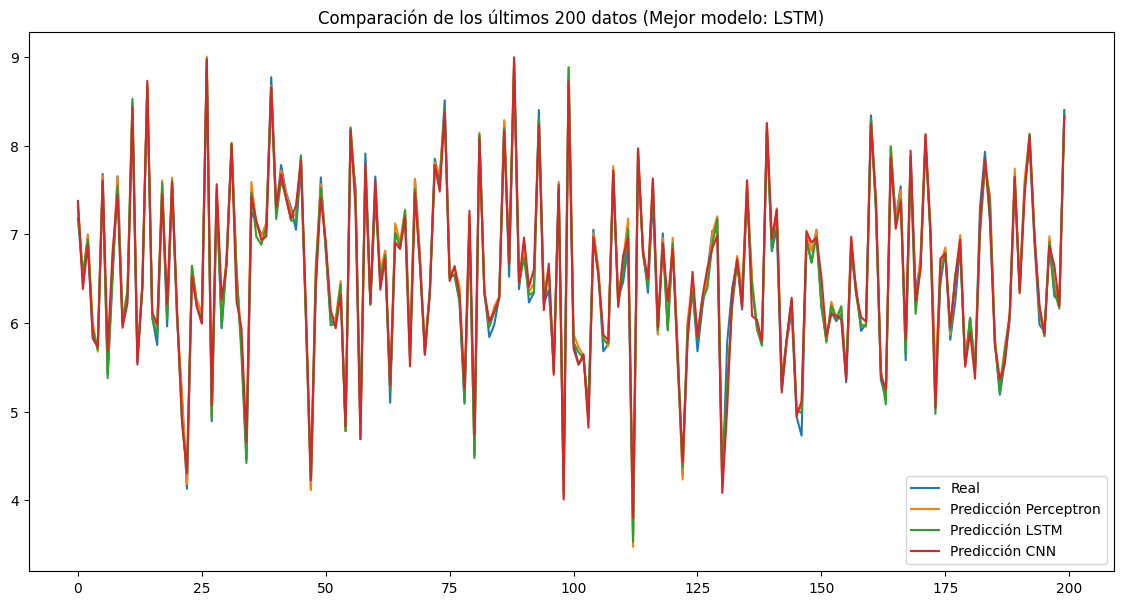

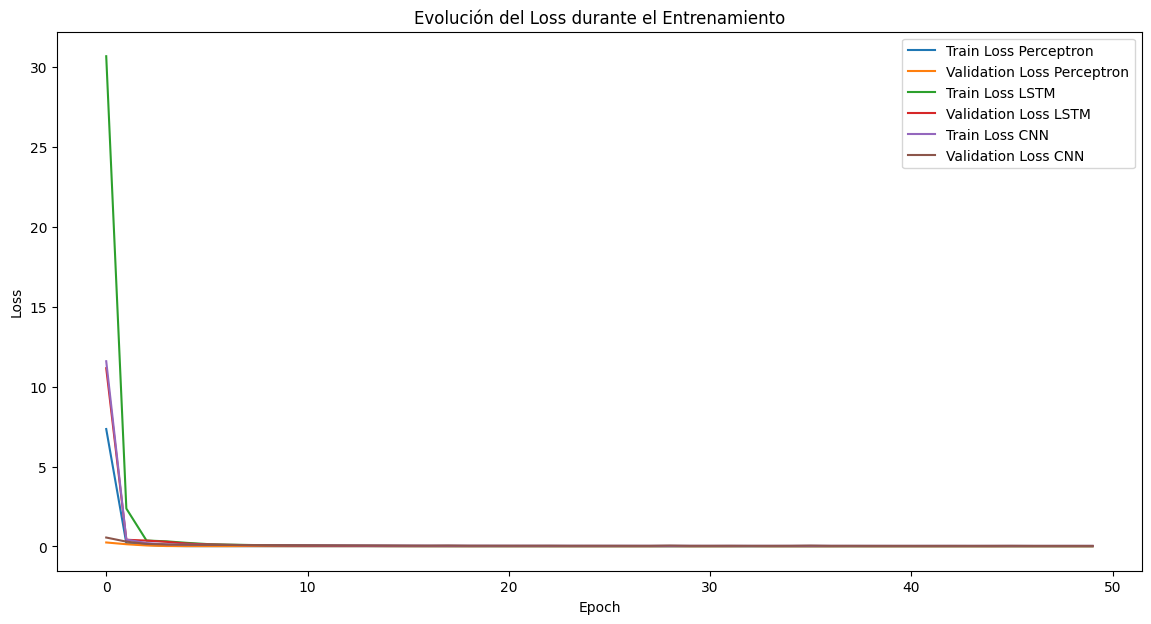

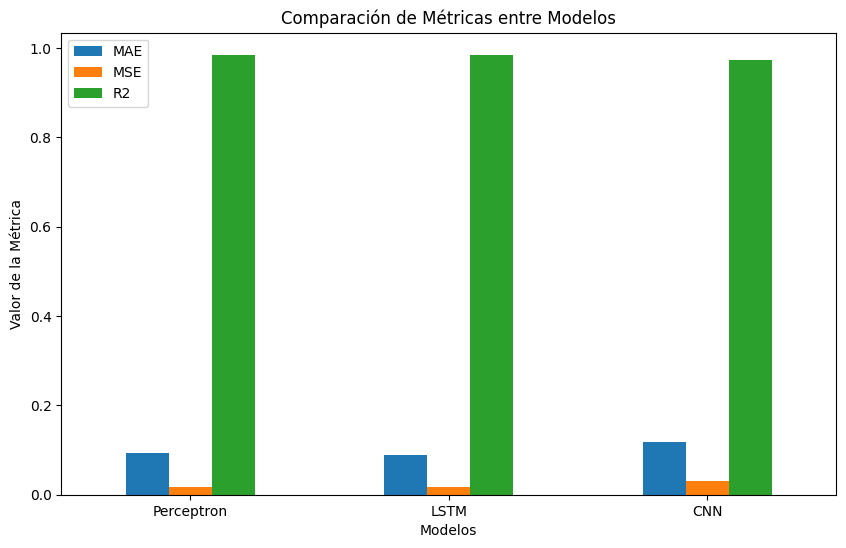

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de los últimos 200 datos
last_200 = len(y_test) - 200 if len(y_test) > 200 else 0

plt.figure(figsize=(14, 7))
plt.plot(y_test.values[last_200:], label='Real')
plt.plot(y_pred_perceptron_series.values[last_200:], label='Predicción Perceptron')
plt.plot(y_pred_lstm_series.values[last_200:], label='Predicción LSTM')
plt.plot(y_pred_cnn_series.values[last_200:], label='Predicción CNN')
plt.legend()
plt.title(f'Comparación de los últimos 200 datos (Mejor modelo: {best_model_index})')
plt.show()

# Visualización de la evolución del loss durante el entrenamiento
plt.figure(figsize=(14, 7))

# Perceptron
plt.plot(history_perceptron.history['loss'], label='Train Loss Perceptron')
plt.plot(history_perceptron.history['val_loss'], label='Validation Loss Perceptron')

# LSTM
plt.plot(history_lstm.history['loss'], label='Train Loss LSTM')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss LSTM')

# CNN
plt.plot(history_cnn.history['loss'], label='Train Loss CNN')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss CNN')

plt.title('Evolución del Loss durante el Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparación de métricas
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor de la Métrica')
plt.xticks(rotation=0)
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
                 MAE       MSE        R2
Perceptron  0.094119  0.016553  0.985264
LSTM        0.088745  0.016823  0.985024
CNN         0.117773  0.029698  0.973563


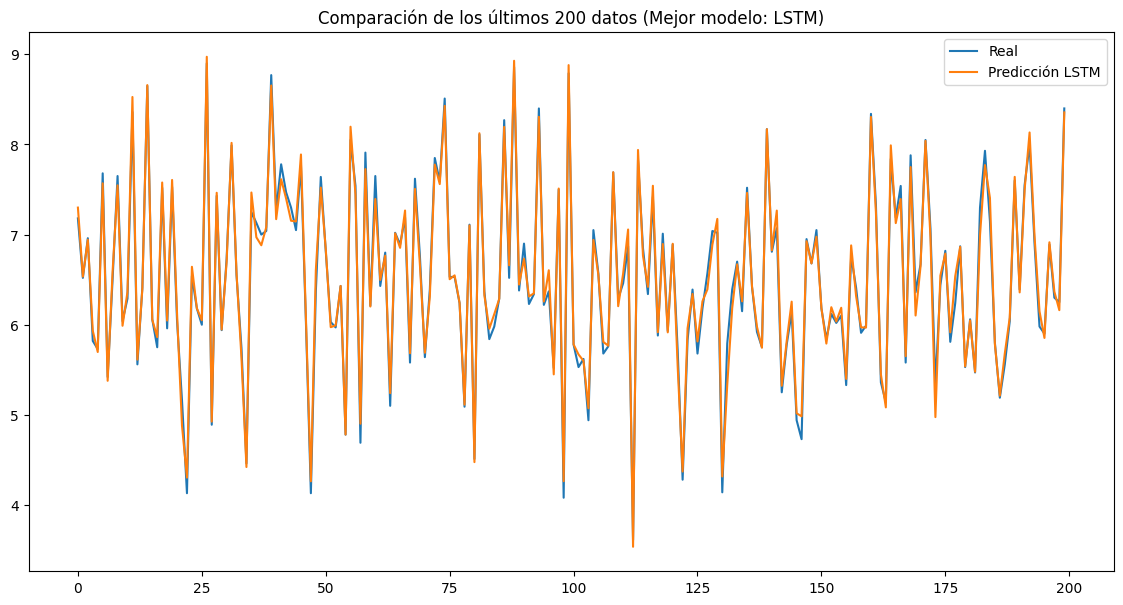

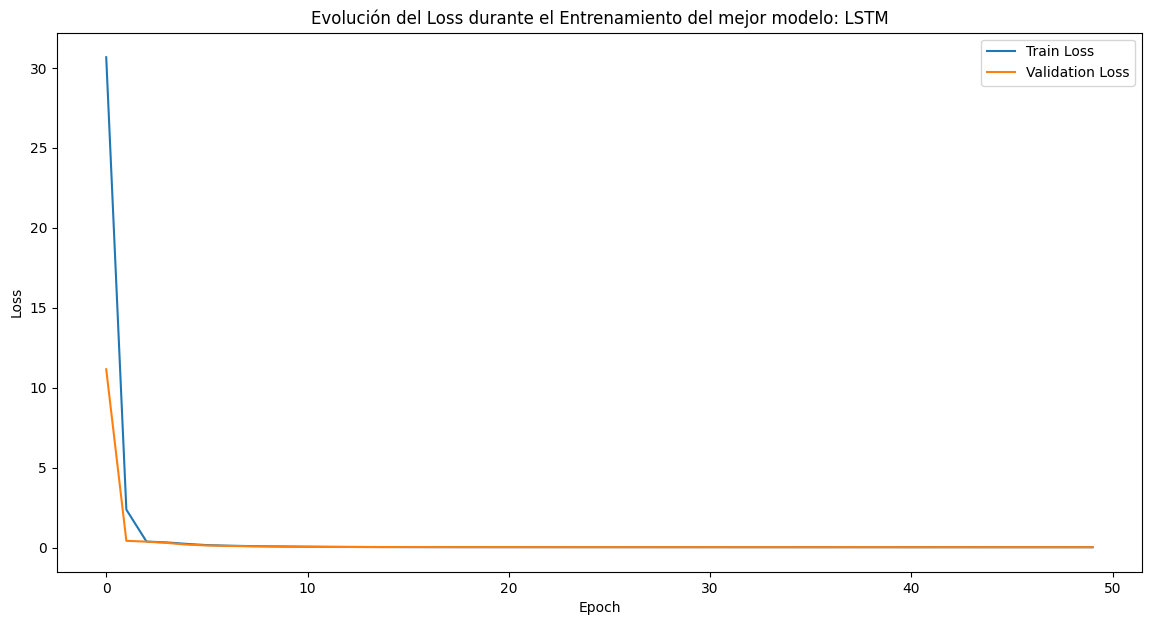

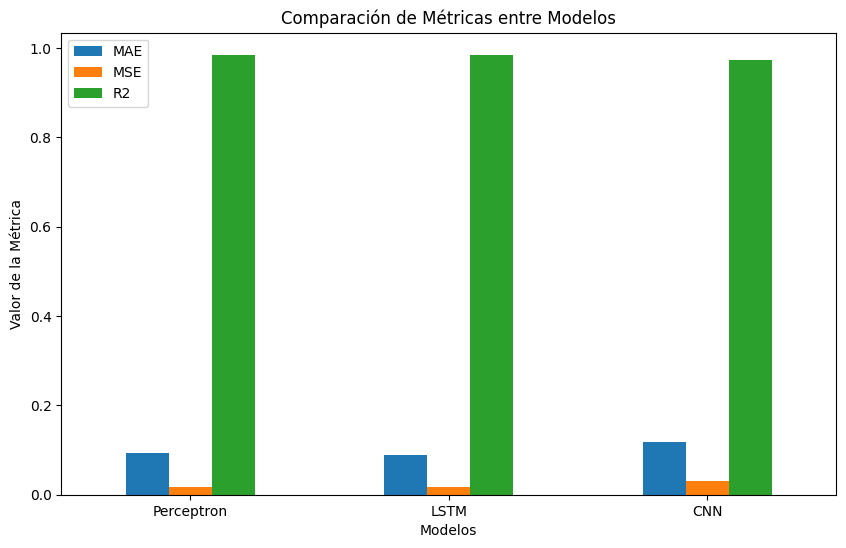

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

#############################corregir#####################################
####################################################################
# Calcular las predicciones
y_pred_perceptron = model_perceptron.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()
y_pred_cnn = model_cnn.predict(X_test_cnn).flatten()

# Calcular métricas
metrics = {
    'MAE': [
        mean_absolute_error(y_test, y_pred_perceptron),
        mean_absolute_error(y_test, y_pred_lstm),
        mean_absolute_error(y_test, y_pred_cnn)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_perceptron),
        mean_squared_error(y_test, y_pred_lstm),
        mean_squared_error(y_test, y_pred_cnn)
    ],
    'R2': [
        r2_score(y_test, y_pred_perceptron),
        r2_score(y_test, y_pred_lstm),
        r2_score(y_test, y_pred_cnn)
    ]
}
#####################################################################################
##########################################################
metrics_df = pd.DataFrame(metrics, index=['Perceptron', 'LSTM', 'CNN'])

# Mostrar las métricas
print(metrics_df)

# Determinar el mejor modelo basado en MAE
best_model_name = metrics_df['MAE'].idxmin()

# Convertir el nombre del mejor modelo en un índice entero
best_model_index = ['Perceptron', 'LSTM', 'CNN'].index(best_model_name)

# Guardar las predicciones del mejor modelo utilizando el índice entero
best_model_predictions = [y_pred_perceptron, y_pred_lstm, y_pred_cnn][best_model_index]

# Visualización de los últimos 200 datos
last_200 = len(y_test) - 200 if len(y_test) > 200 else 0

plt.figure(figsize=(14, 7))
plt.plot(y_test.iloc[last_200:].values, label='Real')
plt.plot(best_model_predictions[last_200:], label=f'Predicción {best_model_name}')
plt.legend()
plt.title(f'Comparación de los últimos 200 datos (Mejor modelo: {best_model_name})')
plt.show()                                                     

##################################################################
#codigo con errores
# Obtener los historiales de pérdidas del mejor modelo
#if best_model_name == 'Perceptron':
#    best_model_history = model_perceptron.history
#elif best_model_name == 'LSTM':
#    best_model_history = model_lstm.history
#else:
#    best_model_history = model_cnn.history
##
# Plot del loss
#plt.figure(figsize=(14, 7))
#plt.plot(best_model_history.history['loss'], label='Train Loss')
#plt.plot(best_model_history.history['val_loss'], label='Validation Loss')
#plt.title(f'Evolución del Loss durante el Entrenamiento del mejor modelo: {best_model_name}')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()
##########################################
#codigo corregido:
# Obtener el historial de pérdidas del mejor modelo
if best_model_name == 'Perceptron':
    best_model_history = history_perceptron.history
elif best_model_name == 'LSTM':
    best_model_history = history_lstm.history
else:
    best_model_history = history_cnn.history

# Plot del loss
plt.figure(figsize=(14, 7))
plt.plot(best_model_history['loss'], label='Train Loss')
plt.plot(best_model_history['val_loss'], label='Validation Loss')
plt.title(f'Evolución del Loss durante el Entrenamiento del mejor modelo: {best_model_name}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##########################################
# Comparación de métricas
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor de la Métrica')
plt.xticks(rotation=0)
plt.show()